## Graduate Admission Analysis and Prediction

### Importing the necessary modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Exploring the dataset

In [426]:
df = pd.read_csv('C:/Users/Dell/Desktop/Data_Analysis/Admission_Prediction/Admission_Predict.csv')

In [427]:
print(f'The columns in the dataframe are \n {df.columns}')

The columns in the dataframe are 
 Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [267]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [268]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


#### Dropping "Serial No." column as is it is irrelevant and renaming some of the columns to make them more descriptive

In [428]:
df.drop(['Serial No.'] , axis='columns' , inplace=True)

df.rename(columns={'GRE Score' : 'GRE', 'TOEFL Score' : 'TOEFL', 'Chance of Admit' : 'ChanceofAdmit'} , inplace=True)

df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [34]:
# Let's see the detail information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE                  400 non-null int64
TOEFL                400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [36]:
# General statistics of the data
df.describe()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Take away: 
1)from info() we can see there is no null values in data, this also gives info about the data types.

2)describe() tells that some students got full marks in GRE and TOEFL and there is no student with 10 CGPA. Chance of Admit                 has maximum value 0.97

### Data Visualization

#### Finding Correlation between All Columns
1)By constructing Pairplot.

2)By constructing Correlation heatmap.

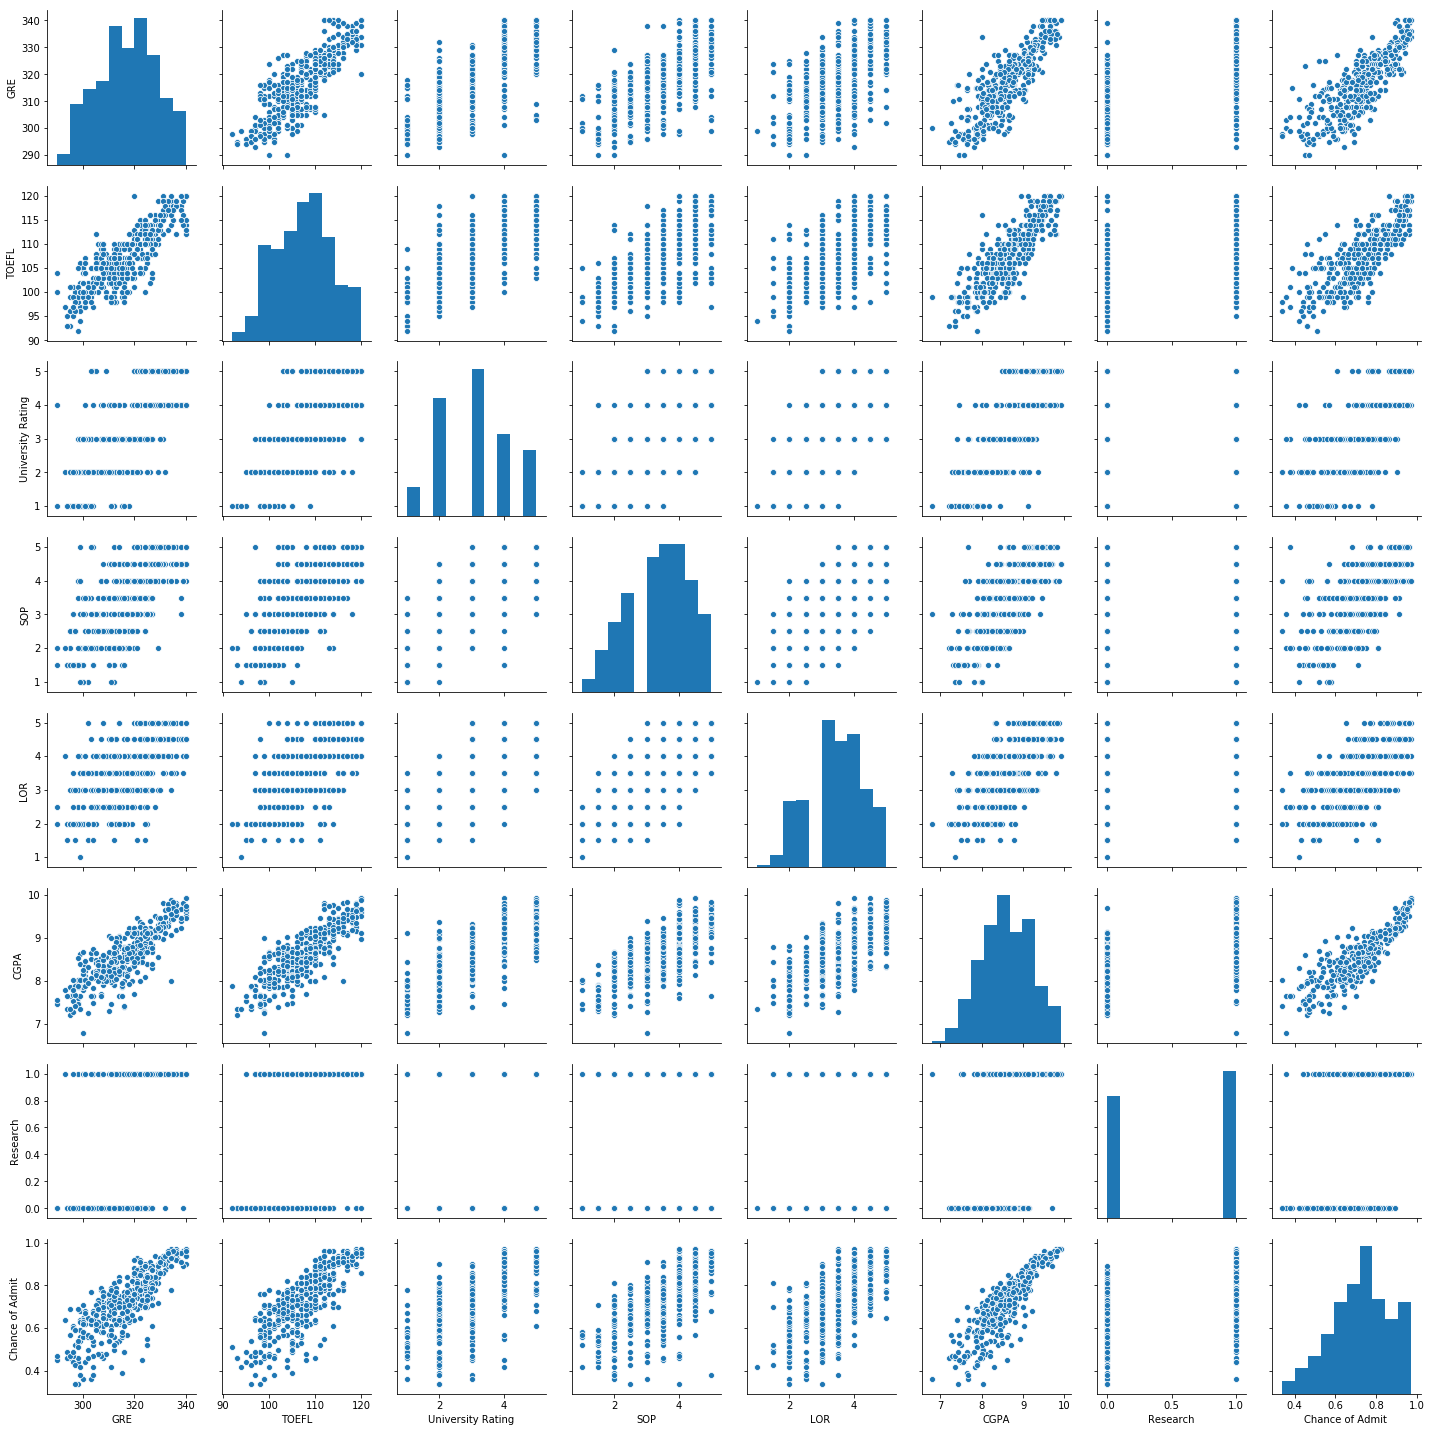

In [384]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

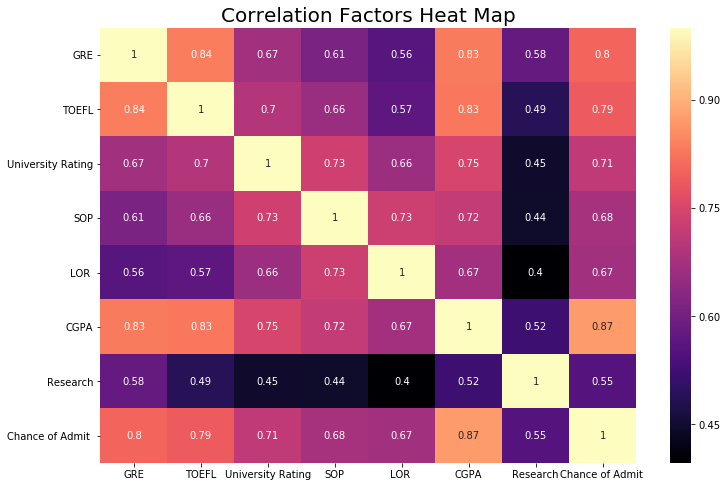

In [395]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True ,cmap='magma').set_title('Correlation Factors Heat Map', color='black', size='20')

#### And since one of our goals is to predict the chance of admission, let's take a look on how the different variables correlate with it.

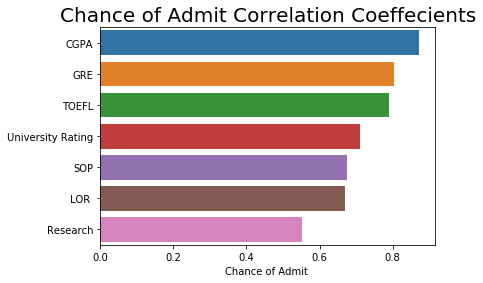

In [448]:
COA_corr = pd.DataFrame(df.corr()['Chance of Admit '])
COA_corr.drop('Chance of Admit ', inplace=True)
COA_corr.sort_values(['Chance of Admit '], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Chance of Admit ']
sns.barplot(x=COA_corr_y,y=COA_corr_x).set_title('Chance of Admit Correlation Coeffecients', size='20')
plt.show()

### Let's explore the top three features (CGPA, GRE and TOEFL) to get a better understanding.

#### CGPA VS Chance of Admit

The Cumulative Grade Point Average is a 10 point grading system.

From the data shown below, it appears the submissions are normally distributed. With a mean of 8.6 and standard deviation of 0.6.

Lowest CGPA is 6.8
Average CGPA is 8.598924999999998
Highest CGPA is 9.92


Text(0.5, 1.0, 'CGPA vs Chance of Admit')

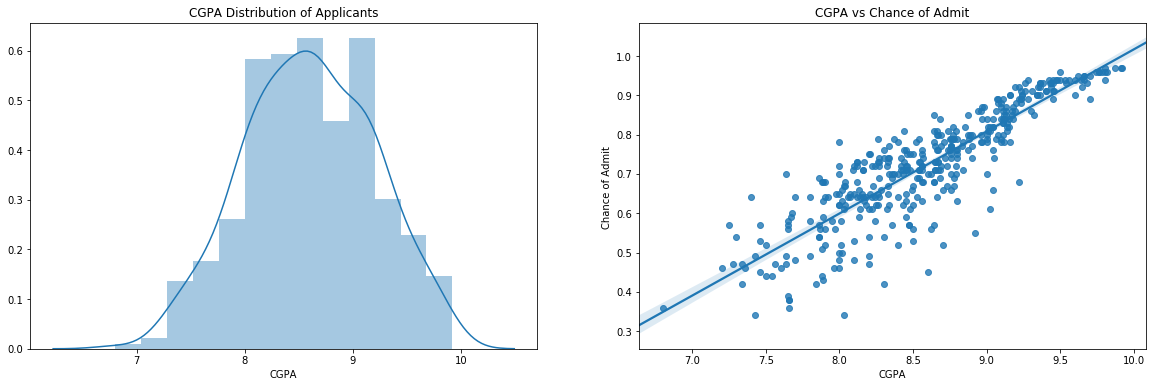

In [153]:
print(f"Lowest CGPA is {df['CGPA'].min()}")
print(f"Average CGPA is {df['CGPA'].mean()}")
print(f"Highest CGPA is {df['CGPA'].max()}")

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['CGPA'], df['Chance of Admit '])
plt.title('CGPA vs Chance of Admit')

#### So, as is evident candidate's CGPA has to minimum of 7.6 so as to have atleast 50% chance of receiving admit. For a candidate to have a fair chance to stand out, CGPA has to be greater than average CGPA score of 8.6 as being above this score would give candidate 80% chance of admit

### GRE Score vs Chance of Admit


GRE Score

The Graduate Record Examination is a standarized exam, often required for admission to graduate and MBA programs globally. It's made up of three components:

    Analytical Writing (Scored on a 0-6 scale in half-point increments)
    Verbal Reasoning (Scored on a 130-170 scale)
    Quantitative Reasoning (Scored on a 130-170 scale)

In this dataset, the GRE Score is based on a maximum of 340 points. The mean is 317 with a standard deviation of 11.5.
GRE Score vs Chance of Admit

GRE scores have a strong correlation with the chance of admission however not as strong as one's CGPA.


Lowest GRE Score is 290
Average GRE Score is 316.8075
Highest GRE Score is 340


Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

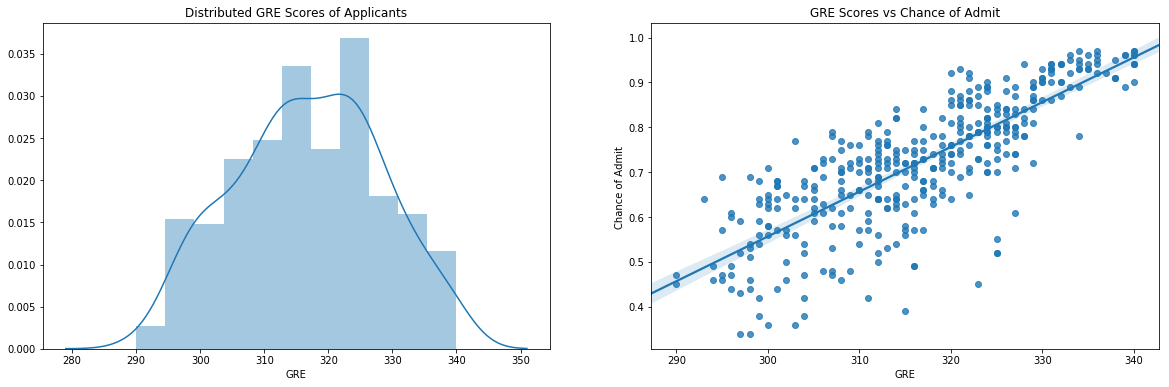

In [136]:
print(f"Lowest GRE Score is {df['GRE'].min()}")
print(f"Average GRE Score is {df['GRE'].mean()}")
print(f"Highest GRE Score is {df['GRE'].max()}")

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['GRE'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['GRE'], df['Chance of Admit '])
plt.title('GRE Scores vs Chance of Admit')

#### So, as is evident candidate's GRE Score has to minimum of 295 so as to have atleast 50% chance of receiving admit. For a candidate to have a fair chance to stand out, GRE Score has to be greater than average GRE score of 317 as being above this score would give candidate 70% chance of admit

### TOEFL Score

The Test of English as a Foreign Language is a standarized test for non-native English speakers that are choosing to enroll in English-speaking universities.

The test is split up into 4 sections:

    Reading
    Listening
    Speaking
    Writing

All sections are scored out of 30, giving the exam a total score of 120 marks. In this dataset, the TOEFL scores have a mean of 107 and a standard deviation of 6.
TOEFL Score vs Chance of Admit

Like GRE scores, the scores received for the TOEFL strongly correlate to an applicants chance of admission.

Lowest TOEFL Score is 92
Average TOEFL Score is 107.41
Highest TOEFL Score is 120


Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

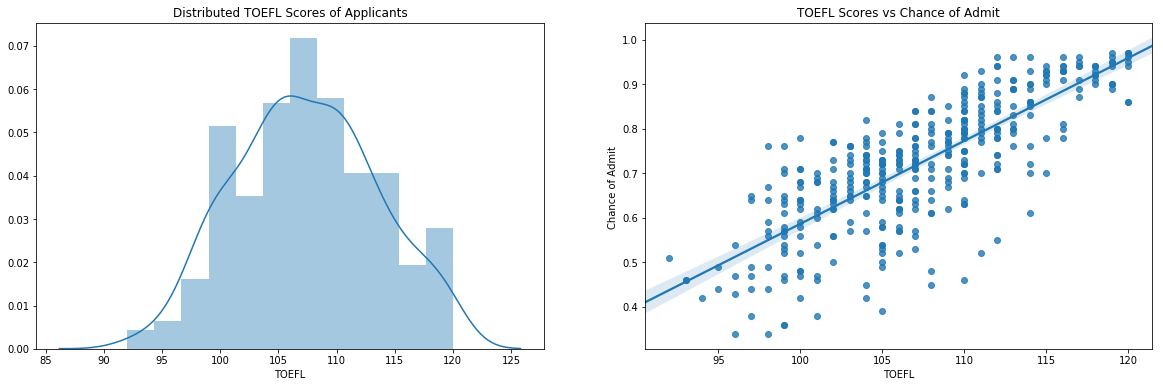

In [138]:
print(f"Lowest TOEFL Score is {df['TOEFL'].min()}")
print(f"Average TOEFL Score is {df['TOEFL'].mean()}")
print(f"Highest TOEFL Score is {df['TOEFL'].max()}")
      
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['TOEFL'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['TOEFL'], df['Chance of Admit '])
plt.title('TOEFL Scores vs Chance of Admit')

#### As evident candidate's TOEFL Score has to be minimum of 96 so as to have atleast 50% chance of receiving admit. For a candidate to have a fair chance to stand out, TOEFL Score has to be greater than the average TOELF score of 107 as being above this score would give candidate 70% chance of admit

##### Just for curiosity, Let's explore the data a little bit further regarding research, SOP, LOR, and university rankings. Even though they hold a lower importance in the chance of admission, it would be nice to understand their characteristics in the dataset.

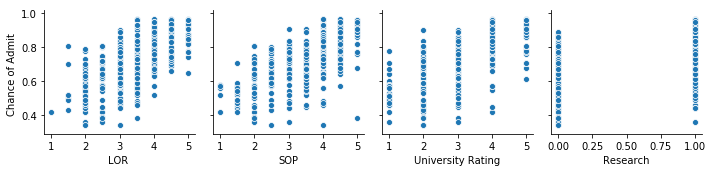

In [152]:
sns.pairplot(df,x_vars=['LOR ','SOP','University Rating','Research'],
             y_vars='Chance of Admit ')
plt.tight_layout()

#### We can see LOR, SOP and University Ratings with scores 3-5 have almost same chance of receiving admits 

#### Average requirements of all features to get admission for all universities on the basis of their Ratings.

In [173]:
# Groupby the data by "University rating".
df.groupby("University Rating").mean()

,GRE,TOEFL,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


In [489]:
#print(f"Minimum requirements for more than 70% chance to get admission.\n {df[(df['Chance of Admit ']>0.70)].min()}")

### CGPA VS University Ratings

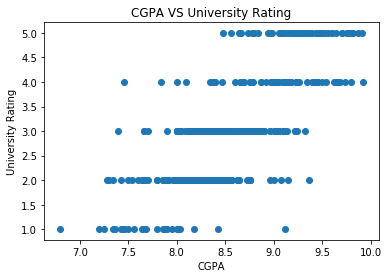

In [204]:
plt.scatter(df["CGPA"],df["University Rating"])
plt.title("CGPA VS University Rating")
plt.xlabel("CGPA")
plt.ylabel("University Rating")
plt.show()

#### As the quality of the university increases, the CGPA score increases.

### GRE VS TOEFL

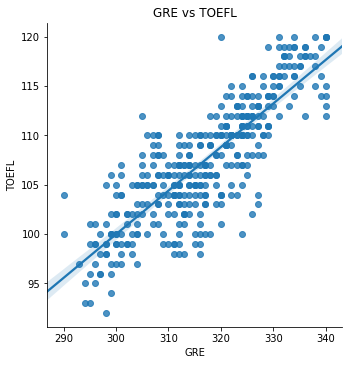

In [334]:
fig = sns.lmplot(x="GRE", y="TOEFL", data=df)
plt.title("GRE vs TOEFL")
plt.show()

### Candidates scoring good GRE marks shows candidates also get higher TOEFL scores

### GRE VS University Ratings

Text(0, 0.5, 'GRE')

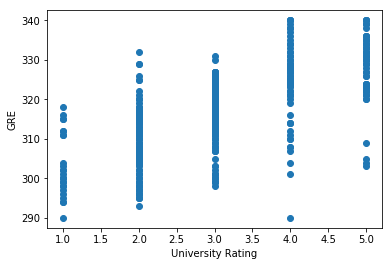

In [398]:
plt.scatter(df['University Rating'], df['GRE'])
plt.xlabel('University Rating')
plt.ylabel('GRE')

#### As is evident, candidates with high university ratings tend to score better in GRE  

### CGPA VS LOR VS RESEARCH

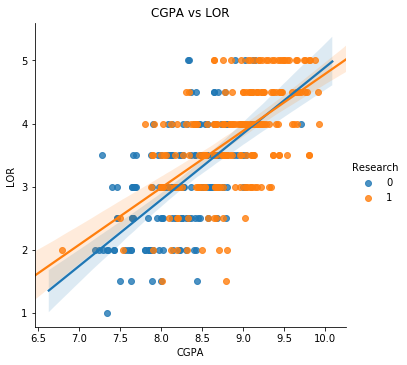

In [490]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("CGPA vs LOR")
plt.show()

#### LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with good LOR and which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LOR

### CGPA VS SOP VS RESEARCH

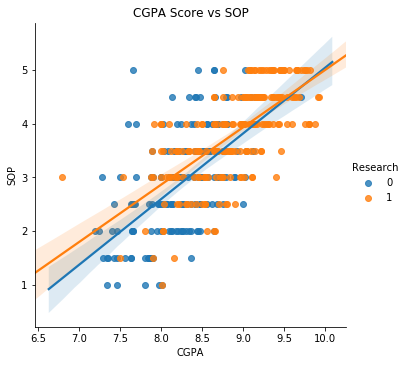

In [402]:
fig = sns.lmplot(x="CGPA", y="SOP", data=df,  hue="Research")
plt.title("CGPA Score vs SOP")
plt.show()

#### CGPA and SOP are not that related, but people with research experience have good things to say in their SOP which explains the slight move towards good SOPs

### CGPA VS Chance of Admit VS Research

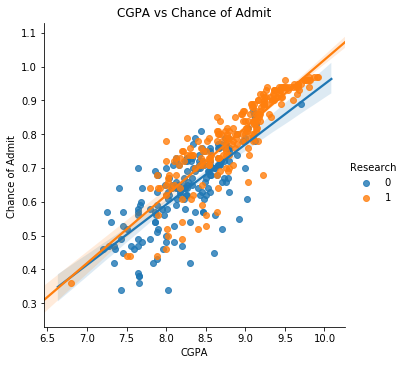

In [492]:
fig = sns.lmplot(x="CGPA", y="Chance of Admit ", data=df,hue="Research")
plt.title("CGPA vs Chance of Admit")
plt.show()

#### Candidates with good CGPA without research experience have also 80% of chance of admit, but this chance boosts to more than 80% for candidates with good CGPA and having research experience 

### Preparing Data for Machine Learning

Now that we understand our dataset, it's time to implement machine learning methods to predict future applicant's chances of admission.

First we have to prepare our data, by splitting it into training and testing data. We'll also scale our data, from 0 to 1, to receive more accurate predictions.


In [344]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [277]:
targets = df['Chance of Admit ']
features = df.drop(columns = {'Chance of Admit '})

In [353]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

### Machine Learning

The end goal is to determine if an applicant will be admitted to the univeristy or not. Therefore, this is a classification case. We'll use multiple techniques and eventually select the method with the best score. The methods used will be:

    1)Logistic Regression
    2)Decision Tree Classification
    3)Random Forest Classification

### Logistic Regression

Our data contains the chance to admit, which is a float value, we should classify the chance of a student's admission as a binary value, accepted and not accepted.

To transform the chance to admit to binary values, we'll assume that if the student's chance is above the mean, they are accepted. If not, they will not be accepted.

So, let's find the mean chance of admission and transform the 'Chance to Admit' column to binary values.


In [279]:
mean_chance = df['Chance of Admit '].mean()
mean_chance

0.7243499999999996

In [405]:
y_train_binary = (y_train > 0.72).astype(int)
y_test_binary = (y_test > 0.72).astype(int)

In [375]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train_binary)
y_predict = LR_model.predict(X_test)
LR_model_score = (LR_model.score(X_test, y_test_binary))*100
LR_model_score

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


90.0

### Decision Tress

In [374]:
dec_tree_model = tree.DecisionTreeClassifier(random_state=0, max_depth=16)
dec_tree_model.fit(X_train, y_train_binary)
y_predict = dec_tree_model.predict(X_test)
dec_tree_model_score = (dec_tree_model.score(X_test, y_test_binary))*100
dec_tree_model_score

85.0

### Random Forests

In [407]:
RF_model = RandomForestClassifier(n_estimators=50,max_depth=6,random_state=0)
RF_model.fit(X_train, y_train_binary)
y_predict = RF_model.predict(X_test)
RF_model_score = (RF_model.score(X_test, y_test_binary))*100
RF_model_score

96.25

### Selecting the Best Algorithm

    Logistic Regression - 90.0%
    Random Forests - 96.25%
    Decision Trees - 85.0%

It seems that Random Forests followed by Logistic Regression are the most accurate methods and will be used to predict the future applicant's chances of admission.

In [376]:
features.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [377]:
targets.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [287]:
RF_model.predict([[320,90,4,4,4,8.9,0]])

array([1])

In [460]:
RF_model.predict([[317,107,4.5,5,5,8.7,1]])

array([1])

In [456]:
RF_model.predict([[317,107,4.5,3.5,3.5,8.7,1]])

array([1])

In [465]:
RF_model.predict([[327,110,4.5,3.5,3.5,8.7,0]])

array([1])

In [480]:
RF_model.predict([[310,105,4.5,4.5,4.5,8.4,1]])

array([0])

In [481]:
RF_model.predict([[310,105,4.5,4.5,4.5,8.5,1]])

array([1])

In [485]:
RF_model.predict([[317,107,4,3.0,3.0,8.7,1]])

array([1])

In [ ]:
RF_model.predict([[310,100,4,3.5,3.5,9,1]])